In [2]:
import geopandas as gpd
import contextily
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
data_dir = os.path.join(os.getcwd(), "..", "..", "preprocessing", "philadelphia_crime", "data")

In [4]:
years_previous = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
years_current = [2020, 2021, 2022, 2023]

In [11]:
philadelphia_crime_df = pd.read_parquet(os.path.join(data_dir, "incidents_part1_part2_2023.parquet"))

In [12]:
philadelphia_crime_df.columns

Index(['the_geom', 'cartodb_id', 'the_geom_webmercator', 'objectid', 'dc_dist',
       'psa', 'dispatch_date_time', 'dispatch_date', 'dispatch_time', 'hour',
       'dc_key', 'location_block', 'ucr_general', 'text_general_code',
       'point_x', 'point_y', 'lat', 'lng'],
      dtype='object')

In [13]:
philadelphia_crime_gdf = gpd.GeoDataFrame(
    philadelphia_crime_df.drop(["lng", "lat"], axis=1),
    geometry=gpd.points_from_xy(philadelphia_crime_df["lng"], philadelphia_crime_df["lat"]),
    crs="EPSG:4326",
)

In [14]:
philadelphia_crime_gdf

,the_geom,cartodb_id,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,geometry
0,0101000020E6100000A51C8299A5C752C006342AD3DCFF...,2,0101000020110F0000F80DE2A145E65FC1E5EC7592BE8F...,114,25,3,2023-03-11 17:12:00+00,2023-03-11,12:12:00,12.0,2.023250e+11,3300 BLOCK HARTVILLE ST,300,Robbery No Firearm,-75.119482,39.998927,POINT (-75.11948 39.99893)
1,0101000020E6100000F9245E3B64CC52C0B7195D940FF6...,4,0101000020110F00000426B7CE54EE5FC1C5E06D37E284...,116,1,1,2023-03-11 18:31:00+00,2023-03-11,13:31:00,13.0,2.023010e+11,2400 BLOCK S 28TH ST,600,Theft from Vehicle,-75.193618,39.922350,POINT (-75.19362 39.92235)
2,0101000020E6100000118A52E7F6C052C0CFF41263190C...,7,0101000020110F00006728CED7EBDA5FC169DB64F8519D...,119,8,2,2023-03-11 22:13:00+00,2023-03-11,17:13:00,17.0,2.023080e+11,9800 BLOCK Roosevelt Blvd,600,Thefts,-75.015070,40.094525,POINT (-75.01507 40.09452)
3,0101000020E6100000E1F9FB7B5FC552C0159C0B6D4A02...,123,0101000020110F00009D28D4D968E25FC13CD5C3D06F92...,96,15,1,2023-03-11 12:42:00+00,2023-03-11,07:42:00,7.0,2.023150e+11,4700 BLOCK GRISCOM ST,600,Thefts,-75.083953,40.017896,POINT (-75.08395 40.01790)
4,0101000020E6100000D1CCD5875CCA52C014B723FFC005...,126,0101000020110F00002F28E30AE2EA5FC10090A3314796...,99,14,1,2023-03-12 00:54:00+00,2023-03-11,19:54:00,19.0,2.023140e+11,5500 BLOCK BLOYD ST,300,Robbery No Firearm,-75.161898,40.044952,POINT (-75.16190 40.04495)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169012,0101000020E6100000F5F983DCE0C952C063382A79EDF5...,3206538,0101000020110F0000CFDC58FA0FEA5FC1EEFC5B72BC84...,11907416,3,2,2023-12-25 22:09:00+00,2023-12-25,17:09:00,17.0,2.023031e+11,400 BLOCK JACKSON ST,2600,All Other Offenses,-75.154349,39.921310,POINT (-75.15435 39.92131)
169013,0101000020E6100000544D94AD83CB52C019460FB6B7FD...,3206539,0101000020110F000047AC5161D7EC5FC142AA0ADD5D8D...,11936133,22,4,2023-12-26 14:31:00+00,2023-12-26,09:31:00,9.0,2.023221e+11,1700 BLOCK N 28TH ST,800,Other Assaults,-75.179912,39.982169,POINT (-75.17991 39.98217)
169014,0101000020E6100000549B6AF3A0CE52C093C74FBADFFD...,3206540,0101000020110F00004EEFD3A021F25FC19C03CE378A8D...,11938562,19,3,2023-12-26 17:36:00+00,2023-12-26,12:36:00,12.0,2.023191e+11,1700 BLOCK N PEACH ST,1100,Fraud,-75.228574,39.983390,POINT (-75.22857 39.98339)
169015,0101000020E610000065E33DDED6CD52C0B8BFA35BE902...,3206541,0101000020110F0000A128D35ECAF05FC15A82B9122093...,11941456,5,1,2023-12-26 17:12:00+00,2023-12-26,12:12:00,12.0,2.023050e+11,100 BLOCK KINGSLEY ST,1100,Fraud,-75.216240,40.022747,POINT (-75.21624 40.02275)


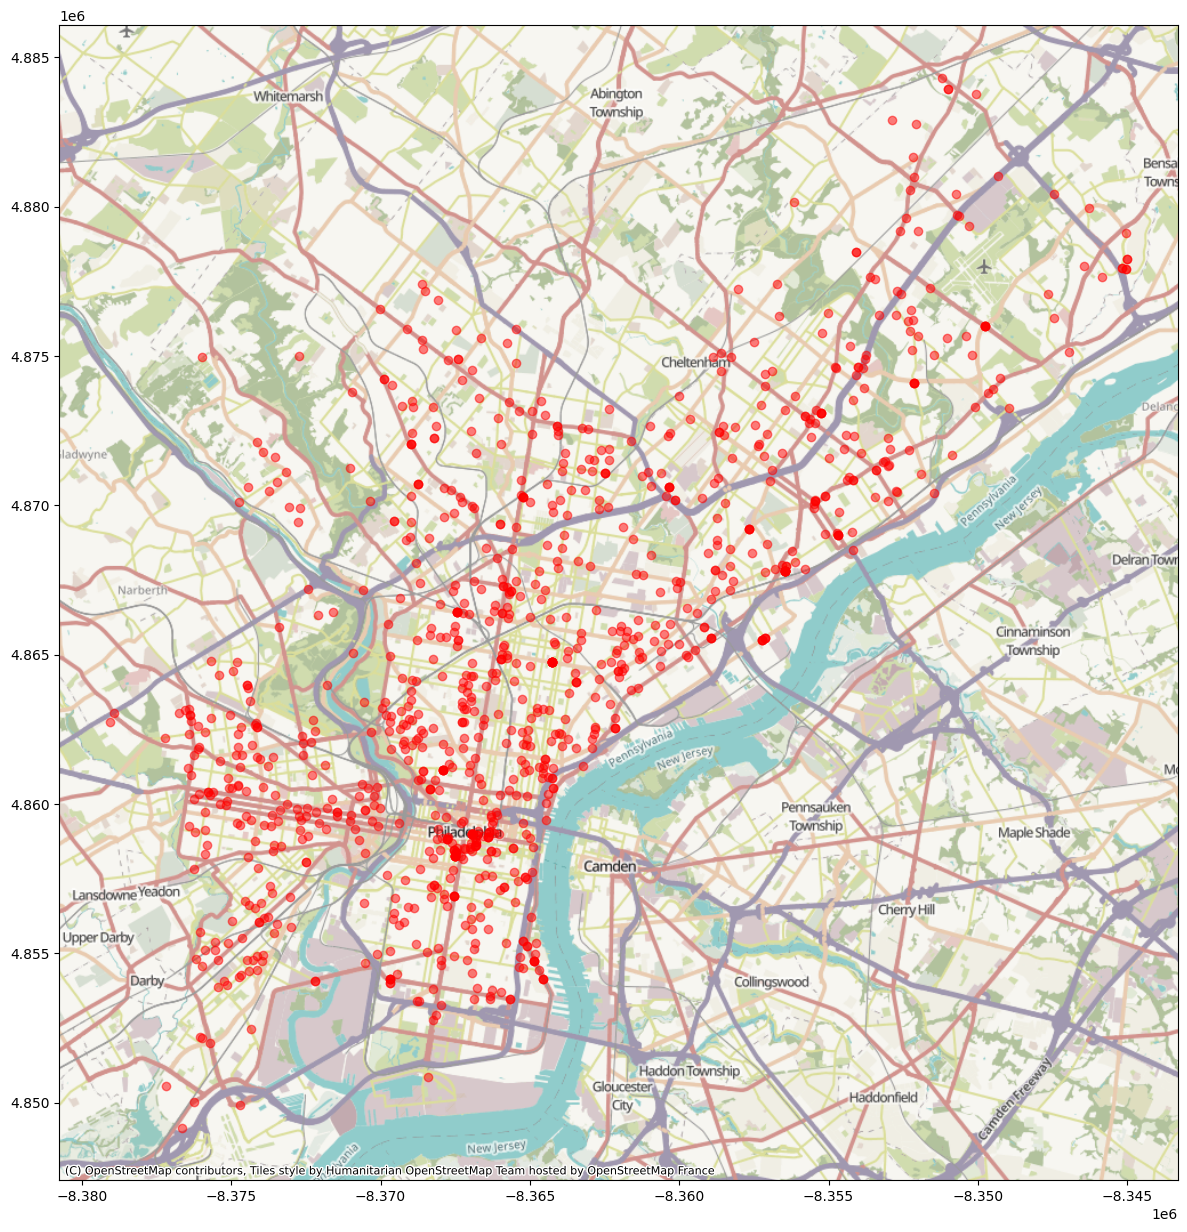

In [15]:
neigh_wm = philadelphia_crime_gdf.iloc[:1000].to_crs(epsg=3857) 
ax = neigh_wm.plot(figsize=(20, 15), alpha=0.5, color="r")
contextily.add_basemap(ax)
plt.show()